# Movie reviews

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Movie reviews. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [1]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [2]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

# Function for feature building and extraction on natural language data

In [3]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        cv = CountVectorizer()
        X_cv = cv.fit_transform(movie_data.review)
        fitted_transformations.append(cv)
        print("Shape of CountVectorizer X:")
        print(X_cv.shape)
    else: # transform() 
        X_cv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of CountVectorizer X:")
        print(X_cv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_cv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_cv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [4]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='moviereviews_train.tsv', my_random_seed=92)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of CountVectorizer X:
(25000, 74849)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9
5  

# Fit (and tune) Various Models

### MODEL: SVM, linear

In [5]:
from sklearn.svm import LinearSVC
svm_0_000001 = LinearSVC(C = 0.000001, max_iter=10000)
svm_0_000001.fit(X_train, y_train)

svm_0_000001_performance_train = BinaryClassificationPerformance(svm_0_000001.predict(X_train), y_train, 'svm_0_000001_train')
svm_0_000001_performance_train.compute_measures()
print(svm_0_000001_performance_train.performance_measures)

{'Pos': 10019, 'Neg': 9981, 'TP': 9635, 'TN': 9834, 'FP': 147, 'FN': 384, 'Accuracy': 0.97345, 'Precision': 0.9849723982825598, 'Recall': 0.9616728216388861, 'desc': 'svm_0_000001_train'}


/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [6]:
from sklearn.svm import LinearSVC
svm_0_00001 = LinearSVC(C = 0.00001, max_iter=10000)
svm_0_00001.fit(X_train, y_train)

svm_0_00001_performance_train = BinaryClassificationPerformance(svm_0_00001.predict(X_train), y_train, 'svm_0_00001_train')
svm_0_00001_performance_train.compute_measures()
print(svm_0_00001_performance_train.performance_measures)

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'Pos': 10019, 'Neg': 9981, 'TP': 9967, 'TN': 9952, 'FP': 29, 'FN': 52, 'Accuracy': 0.99595, 'Precision': 0.9970988395358144, 'Recall': 0.9948098612635992, 'desc': 'svm_0_00001_train'}


In [7]:
from sklearn.svm import LinearSVC
svm_0_0001 = LinearSVC(C = 0.0001, max_iter=10000)
svm_0_0001.fit(X_train, y_train)

svm_0_0001_performance_train = BinaryClassificationPerformance(svm_0_0001.predict(X_train), y_train, 'svm_0_0001_train')
svm_0_0001_performance_train.compute_measures()
print(svm_0_0001_performance_train.performance_measures)

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'Pos': 10019, 'Neg': 9981, 'TP': 10019, 'TN': 9981, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_0_0001_train'}


In [8]:
from sklearn.svm import LinearSVC
svm_0_001 = LinearSVC(C = 0.001, max_iter=10000)
svm_0_001.fit(X_train, y_train)

svm_0_001_performance_train = BinaryClassificationPerformance(svm_0_001.predict(X_train), y_train, 'svm_0_001_train')
svm_0_001_performance_train.compute_measures()
print(svm_0_001_performance_train.performance_measures)

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'Pos': 10019, 'Neg': 9981, 'TP': 10019, 'TN': 9981, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_0_001_train'}


In [9]:
from sklearn.svm import LinearSVC
svm_0_01 = LinearSVC(C = 0.01, max_iter=10000)
svm_0_01.fit(X_train, y_train)

svm_0_01_performance_train = BinaryClassificationPerformance(svm_0_01.predict(X_train), y_train, 'svm_0_01_train')
svm_0_01_performance_train.compute_measures()
print(svm_0_01_performance_train.performance_measures)

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'Pos': 10019, 'Neg': 9981, 'TP': 10019, 'TN': 9981, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_0_01_train'}


In [10]:
from sklearn.svm import LinearSVC
svm_0_1 = LinearSVC(C = 0.1, max_iter=10000)
svm_0_1.fit(X_train, y_train)

svm_0_1_performance_train = BinaryClassificationPerformance(svm_0_1.predict(X_train), y_train, 'svm_0_1_train')
svm_0_1_performance_train.compute_measures()
print(svm_0_1_performance_train.performance_measures)

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'Pos': 10019, 'Neg': 9981, 'TP': 10019, 'TN': 9981, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_0_1_train'}


In [11]:
from sklearn.svm import LinearSVC
svm_1 = LinearSVC(C = 1.0, max_iter=10000)
svm_1.fit(X_train, y_train)

svm_1_performance_train = BinaryClassificationPerformance(svm_1.predict(X_train), y_train, 'svm_1_train')
svm_1_performance_train.compute_measures()
print(svm_1_performance_train.performance_measures)

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'Pos': 10019, 'Neg': 9981, 'TP': 10019, 'TN': 9981, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_1_train'}


In [12]:
from sklearn.svm import LinearSVC
svm_10 = LinearSVC(C = 10.0, max_iter=10000)
svm_10.fit(X_train, y_train)

svm_10_performance_train = BinaryClassificationPerformance(svm_10.predict(X_train), y_train, 'svm_10_train')
svm_10_performance_train.compute_measures()
print(svm_10_performance_train.performance_measures)

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'Pos': 10019, 'Neg': 9981, 'TP': 10019, 'TN': 9981, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_10_train'}


In [13]:
from sklearn.svm import LinearSVC
svm_100 = LinearSVC(random_state = 1, tol = 0.001, C = 100.0)
svm_100.fit(X_train, y_train)

svm_100_performance_train = BinaryClassificationPerformance(svm_100.predict(X_train), y_train, 'svm_100_train')
svm_100_performance_train.compute_measures()
print(svm_100_performance_train.performance_measures)

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'Pos': 10019, 'Neg': 9981, 'TP': 10019, 'TN': 9981, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_100_train'}


In [14]:
from sklearn.svm import LinearSVC
svm_1000 = LinearSVC(C = 1000.0, max_iter=10000)
svm_1000.fit(X_train, y_train)

svm_1000_performance_train = BinaryClassificationPerformance(svm_1000.predict(X_train), y_train, 'svm_1000_train')
svm_1000_performance_train.compute_measures()
print(svm_1000_performance_train.performance_measures)

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'Pos': 10019, 'Neg': 9981, 'TP': 10019, 'TN': 9981, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_1000_train'}


In [15]:
from sklearn.svm import LinearSVC
svm_10000 = LinearSVC(C = 10000.0, max_iter=10000)
svm_10000.fit(X_train, y_train)

svm_10000_performance_train = BinaryClassificationPerformance(svm_10000.predict(X_train), y_train, 'svm_10000_train')
svm_10000_performance_train.compute_measures()
print(svm_10000_performance_train.performance_measures)

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'Pos': 10019, 'Neg': 9981, 'TP': 10019, 'TN': 9981, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_10000_train'}


In [16]:
from sklearn.svm import LinearSVC
svm_100000 = LinearSVC(C = 100000.0, max_iter=10000)
svm_100000.fit(X_train, y_train)

svm_100000_performance_train = BinaryClassificationPerformance(svm_100000.predict(X_train), y_train, 'svm_100000_train')
svm_100000_performance_train.compute_measures()
print(svm_100000_performance_train.performance_measures)

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'Pos': 10019, 'Neg': 9981, 'TP': 10019, 'TN': 9981, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_100000_train'}


---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: SVM, linear

In [18]:
svm_0_000001_performance_test = BinaryClassificationPerformance(svm_0_000001.predict(X_test), y_test, 'svm_0_000001_test')
svm_0_000001_performance_test.compute_measures()
print(svm_0_000001_performance_test.performance_measures)

{'Pos': 2481, 'Neg': 2519, 'TP': 2149, 'TN': 2214, 'FP': 305, 'FN': 332, 'Accuracy': 0.8726, 'Precision': 0.8757131214343928, 'Recall': 0.8661829907295445, 'desc': 'svm_0_000001_test'}


In [19]:
svm_0_00001_performance_test = BinaryClassificationPerformance(svm_0_00001.predict(X_test), y_test, 'svm_0_00001_test')
svm_0_00001_performance_test.compute_measures()
print(svm_0_00001_performance_test.performance_measures)

{'Pos': 2481, 'Neg': 2519, 'TP': 2227, 'TN': 2206, 'FP': 313, 'FN': 254, 'Accuracy': 0.8866, 'Precision': 0.8767716535433071, 'Recall': 0.8976219266424829, 'desc': 'svm_0_00001_test'}


In [20]:
svm_0_0001_performance_test = BinaryClassificationPerformance(svm_0_0001.predict(X_test), y_test, 'svm_0_0001_test')
svm_0_0001_performance_test.compute_measures()
print(svm_0_0001_performance_test.performance_measures)

{'Pos': 2481, 'Neg': 2519, 'TP': 2216, 'TN': 2149, 'FP': 370, 'FN': 265, 'Accuracy': 0.873, 'Precision': 0.8569218870843001, 'Recall': 0.8931882305521966, 'desc': 'svm_0_0001_test'}


In [21]:
svm_0_001_performance_test = BinaryClassificationPerformance(svm_0_001.predict(X_test), y_test, 'svm_0_001_test')
svm_0_001_performance_test.compute_measures()
print(svm_0_001_performance_test.performance_measures)

{'Pos': 2481, 'Neg': 2519, 'TP': 2193, 'TN': 2127, 'FP': 392, 'FN': 288, 'Accuracy': 0.864, 'Precision': 0.8483558994197292, 'Recall': 0.8839177750906893, 'desc': 'svm_0_001_test'}


In [22]:
svm_0_01_performance_test = BinaryClassificationPerformance(svm_0_01.predict(X_test), y_test, 'svm_0_01_test')
svm_0_01_performance_test.compute_measures()
print(svm_0_01_performance_test.performance_measures)

{'Pos': 2481, 'Neg': 2519, 'TP': 2188, 'TN': 2127, 'FP': 392, 'FN': 293, 'Accuracy': 0.863, 'Precision': 0.8480620155038759, 'Recall': 0.8819024586860137, 'desc': 'svm_0_01_test'}


In [23]:
svm_0_1_performance_test = BinaryClassificationPerformance(svm_0_1.predict(X_test), y_test, 'svm_0_1_test')
svm_0_1_performance_test.compute_measures()
print(svm_0_1_performance_test.performance_measures)

{'Pos': 2481, 'Neg': 2519, 'TP': 2187, 'TN': 2126, 'FP': 393, 'FN': 294, 'Accuracy': 0.8626, 'Precision': 0.8476744186046512, 'Recall': 0.8814993954050786, 'desc': 'svm_0_1_test'}


In [24]:
svm_1_performance_test = BinaryClassificationPerformance(svm_1.predict(X_test), y_test, 'svm_1_test')
svm_1_performance_test.compute_measures()
print(svm_1_performance_test.performance_measures)

{'Pos': 2481, 'Neg': 2519, 'TP': 2187, 'TN': 2126, 'FP': 393, 'FN': 294, 'Accuracy': 0.8626, 'Precision': 0.8476744186046512, 'Recall': 0.8814993954050786, 'desc': 'svm_1_test'}


In [25]:
svm_10_performance_test = BinaryClassificationPerformance(svm_10.predict(X_test), y_test, 'svm_10_test')
svm_10_performance_test.compute_measures()
print(svm_10_performance_test.performance_measures)

{'Pos': 2481, 'Neg': 2519, 'TP': 2187, 'TN': 2126, 'FP': 393, 'FN': 294, 'Accuracy': 0.8626, 'Precision': 0.8476744186046512, 'Recall': 0.8814993954050786, 'desc': 'svm_10_test'}


In [26]:
svm_100_performance_test = BinaryClassificationPerformance(svm_100.predict(X_test), y_test, 'svm_100_test')
svm_100_performance_test.compute_measures()
print(svm_100_performance_test.performance_measures)

{'Pos': 2481, 'Neg': 2519, 'TP': 2187, 'TN': 2126, 'FP': 393, 'FN': 294, 'Accuracy': 0.8626, 'Precision': 0.8476744186046512, 'Recall': 0.8814993954050786, 'desc': 'svm_100_test'}


In [27]:
svm_1000_performance_test = BinaryClassificationPerformance(svm_1000.predict(X_test), y_test, 'svm_1000_test')
svm_1000_performance_test.compute_measures()
print(svm_1000_performance_test.performance_measures)

{'Pos': 2481, 'Neg': 2519, 'TP': 2187, 'TN': 2126, 'FP': 393, 'FN': 294, 'Accuracy': 0.8626, 'Precision': 0.8476744186046512, 'Recall': 0.8814993954050786, 'desc': 'svm_1000_test'}


In [28]:
svm_10000_performance_test = BinaryClassificationPerformance(svm_10000.predict(X_test), y_test, 'svm_10000_test')
svm_10000_performance_test.compute_measures()
print(svm_10000_performance_test.performance_measures)

{'Pos': 2481, 'Neg': 2519, 'TP': 2187, 'TN': 2126, 'FP': 393, 'FN': 294, 'Accuracy': 0.8626, 'Precision': 0.8476744186046512, 'Recall': 0.8814993954050786, 'desc': 'svm_10000_test'}


In [29]:
svm_100000_performance_test = BinaryClassificationPerformance(svm_100000.predict(X_test), y_test, 'svm_100000_test')
svm_100000_performance_test.compute_measures()
print(svm_100000_performance_test.performance_measures)

{'Pos': 2481, 'Neg': 2519, 'TP': 2187, 'TN': 2126, 'FP': 393, 'FN': 294, 'Accuracy': 0.8626, 'Precision': 0.8476744186046512, 'Recall': 0.8814993954050786, 'desc': 'svm_100000_test'}


### ROC plot to compare performance of various models and fits

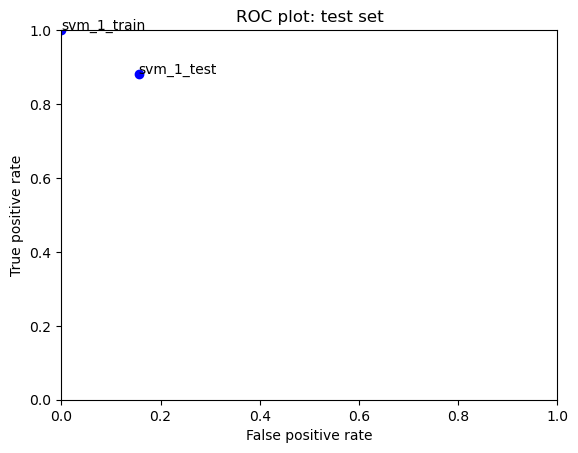

In [30]:
fits = [ 
        # svm_0_000001_performance_train, svm_0_000001_performance_test,
        # svm_0_00001_performance_train, svm_0_00001_performance_test,
        # svm_0_0001_performance_train, svm_0_0001_performance_test,
        # svm_0_001_performance_train, svm_0_001_performance_test,
        #svm_0_01_performance_train, svm_0_01_performance_test,
        svm_1_performance_train, svm_1_performance_test,
]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [31]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='moviereviews_test.tsv', my_random_seed=92, test=True)
print("Number of rows in the submission test set (should be 25,000): ")

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 2 columns 

the data types for each of the columns in movie_data:
id        object
review    object
dtype: object 

the first 10 rows in movie_data:
         id                                             review
0  12311_10  Naturally in a film who's main themes are of m...
1    8348_2  This movie is a disaster within a disaster fil...
2    5828_4  All in all, this is a movie for kids. We saw i...
3    7186_2  Afraid of the Dark left me with the impression...
4   12128_7  A very accurate depiction of small time mob li...
Shape of CountVectorizer X:
(25000, 74849)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         131           5
1         169          15
2         176          18
3         112           5
4         133           8
5         331          20
6         121          18
7         230          22
8          59           3
9         224          14
Size of

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [106]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = svm_0_00001.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.4632


In [107]:
raw_data.head()

,id,review,word_count,punc_count
0,12311_10,Naturally in a film who's main themes are of m...,131,5
1,8348_2,This movie is a disaster within a disaster fil...,169,15
2,5828_4,"All in all, this is a movie for kids. We saw i...",176,18
3,7186_2,Afraid of the Dark left me with the impression...,112,5
4,12128_7,A very accurate depiction of small time mob li...,133,8


In [108]:
my_submission.head()

,id,prediction
0,12311_10,1
1,8348_2,0
2,5828_4,0
3,7186_2,0
4,12128_7,1


In [109]:
my_submission.shape

(25000, 2)

In [110]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('moviereviews_submission.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation